In [1]:
%matplotlib inline

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, diamond
from skimage.color import label2rgb
from skimage.exposure import histogram

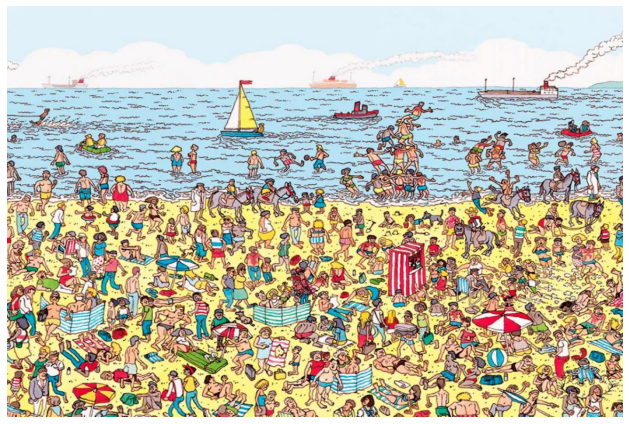

In [6]:
'''Copyright Disclamer! Image is being used under the fair use standards!'''

# display orignal Waldo image as downloaded from google images 
img = Image.open('/mnt/chromeos/GoogleDrive/MyDrive/Datasets/waldo.jpeg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)
ax.set_axis_off()
plt.tight_layout()

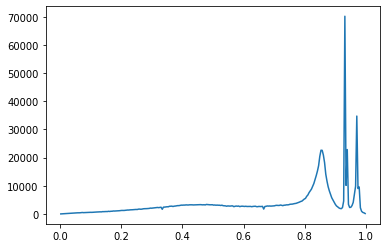

In [12]:
# Reference:
# taken from Brandon Rohrer's article titled 
# How to Convert an RGB Image to Grayscale as found @ 
# https://www.kdnuggets.com/2019/12/convert-rgb-image-grayscale.html

# import color jpeg image with Image and convert to a normalized 3D numpy
color_img = np.asarray(Image.open('/mnt/chromeos/GoogleDrive/MyDrive/Datasets/waldo.jpeg'))/255

# convert the 3D color image to a 2D greyscale image by taking the mean of the three color channels
img = np.mean(color_img, axis=2)

# use the historgrman to determine lumminace values in grayscale
hist, hist_centers = histogram(img)

# plot the historgram of the greyscale image for good threshold value for waldo
plt.plot(hist_centers, hist)
plt.show()

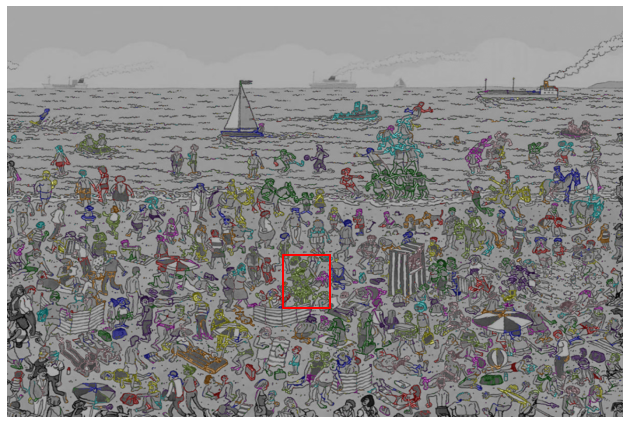

In [19]:
# Reference:
# taken from label and segmentation tutorial found @ 
# https://scikit-image.org/docs/dev/auto_examples/segmentation/
# plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py

# Thought Process: 
# Since waldo is primarily red and in uint8 that would equate 
# to a 1/3, the threshold was set to this
# (will also get green, blue, Dark red, Darkyellow, etc) other colors too!

bw = closing(img <.33 , square(3))# playing with square/diamond will get you differnt characters

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)

# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=img, bg_label=0)

# create the subplots and call imshow
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
      # calcualte where waldo may be based on region area  
    if region.area >= 1980 and region.area < 2405:
        # draw rectangle around segmented areas where Waldo could be
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
# plt.savefig('art.png')